In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

C:\Users\kisho\AppData\Local\Temp\ipykernel_14516\2495388112.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
nestdf = pd.read_csv('./Nest.csv')
partavgdf = pd.read_csv('./Part_Avg.csv')

In [3]:
nestdf.head()

,ixJobSummary,fStrategies,dLengthUsed_Avg,dWidthUsed_Avg,dPartArea_Job,dTrueAreaRectified_Job
0,130032,0,240.00000,95.99000,519.0404,23037.600000
1,145075,8,108.45324,39.26320,18389.9746,21573.573062
2,233110,8,38.70940,35.73610,879.9165,1383.322989
3,286531,8,69.70170,60.55855,5992.2342,9448.707993
4,504531,0,6.80700,38.00690,198.8594,258.712968


In [5]:
joined_nest_partsavg_df = pd.merge(nestdf, partavgdf, on='ixJobSummary', how='inner')
joined_nest_partsavg_df #avg num of parts and nest data in one df

,ixJobSummary,fStrategies,dLengthUsed_Avg,dWidthUsed_Avg,dPartArea_Job,dTrueAreaRectified_Job,dLength_Avg,dWidth_Avg,dArea_Avg,cNested_Avg,fExtShape_Avg,dExtArea_Avg,dExtBoundaryDist_Avg,dExtContainedDist_Avg,dLgIntArea_Avg,dLgIntBoundaryDist_Avg,dLgIntContainedDist_Avg,dLgExtConArea_Avg,dLgExtConBoundaryDist,dLgExtConContainedDist
0,130032,0,240.000000,95.990000,519.0404,23037.600000,11.214286,7.588371,58.148629,1,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,145075,8,108.453240,39.263200,18389.9746,21573.573062,38.347309,12.843400,475.076800,4,5,496.283591,6.026536,39.581636,14.593373,0.535145,2.846391,12.247745,0.341673,0.728891
2,233110,8,38.709400,35.736100,879.9165,1383.322989,37.702200,20.209600,439.958200,2,0,439.958200,9.161500,36.520700,0.000000,0.000000,0.000000,60.162600,2.761000,12.675600
3,286531,8,69.701700,60.558550,5992.2342,9448.707993,17.103650,18.125000,191.540050,12,0,193.776600,6.589750,20.581050,0.279550,0.000000,0.125000,35.632250,2.375000,4.500000
4,504531,0,6.807000,38.006900,198.8594,258.712968,37.000000,5.800000,198.859400,1,0,198.859400,2.644400,37.148100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790931,2583832,0,143.770400,94.319500,3562.2303,13560.352243,52.203125,32.046875,815.453875,1,2,1175.660175,15.350675,52.728425,355.015300,7.125000,15.062500,0.000000,0.000000,0.000000
1790932,548877,4,34.513950,55.300350,2898.6813,4526.656120,23.053571,13.199986,273.049857,4,3,296.410943,6.052186,25.126200,3.782143,0.233057,1.326471,0.000000,0.000000,0.000000
1790933,2420784,8,83.969400,33.398500,1732.8873,2804.452006,83.057750,4.540683,288.814567,1,16,331.347183,2.041967,83.173917,10.515283,0.609483,2.738883,0.000000,0.000000,0.000000
1790934,2302130,8,80.844067,54.065133,7208.6328,14136.765442,43.584450,40.175350,693.526650,5,0,1308.887900,15.457300,51.257850,504.934150,7.507200,22.396550,61.498750,1.939500,9.697650


In [6]:
joined_nest_partsavg_df['CropUtil'] = joined_nest_partsavg_df['dPartArea_Job'] / joined_nest_partsavg_df['dTrueAreaRectified_Job']

joined_nest_partsavg_df.drop('dLengthUsed_Avg', axis=1, inplace=True)
joined_nest_partsavg_df.drop('dWidthUsed_Avg', axis=1, inplace=True)
joined_nest_partsavg_df.drop('dTrueAreaRectified_Job', axis=1, inplace=True)


joined_nest_partsavg_df.drop('ixJobSummary', axis=1, inplace=True)

joined_nest_partsavg_df


,fStrategies,dPartArea_Job,dLength_Avg,dWidth_Avg,dArea_Avg,cNested_Avg,fExtShape_Avg,dExtArea_Avg,dExtBoundaryDist_Avg,dExtContainedDist_Avg,dLgIntArea_Avg,dLgIntBoundaryDist_Avg,dLgIntContainedDist_Avg,dLgExtConArea_Avg,dLgExtConBoundaryDist,dLgExtConContainedDist,CropUtil
0,0,519.0404,11.214286,7.588371,58.148629,1,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022530
1,8,18389.9746,38.347309,12.843400,475.076800,4,5,496.283591,6.026536,39.581636,14.593373,0.535145,2.846391,12.247745,0.341673,0.728891,0.852431
2,8,879.9165,37.702200,20.209600,439.958200,2,0,439.958200,9.161500,36.520700,0.000000,0.000000,0.000000,60.162600,2.761000,12.675600,0.636089
3,8,5992.2342,17.103650,18.125000,191.540050,12,0,193.776600,6.589750,20.581050,0.279550,0.000000,0.125000,35.632250,2.375000,4.500000,0.634186
4,0,198.8594,37.000000,5.800000,198.859400,1,0,198.859400,2.644400,37.148100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.768649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790931,0,3562.2303,52.203125,32.046875,815.453875,1,2,1175.660175,15.350675,52.728425,355.015300,7.125000,15.062500,0.000000,0.000000,0.000000,0.262695
1790932,4,2898.6813,23.053571,13.199986,273.049857,4,3,296.410943,6.052186,25.126200,3.782143,0.233057,1.326471,0.000000,0.000000,0.000000,0.640358
1790933,8,1732.8873,83.057750,4.540683,288.814567,1,16,331.347183,2.041967,83.173917,10.515283,0.609483,2.738883,0.000000,0.000000,0.000000,0.617906
1790934,8,7208.6328,43.584450,40.175350,693.526650,5,0,1308.887900,15.457300,51.257850,504.934150,7.507200,22.396550,61.498750,1.939500,9.697650,0.509921


In [7]:

# Print the DataFrame to verify the changes
joined_nest_partsavg_df

,fStrategies,dPartArea_Job,dLength_Avg,dWidth_Avg,dArea_Avg,cNested_Avg,fExtShape_Avg,dExtArea_Avg,dExtBoundaryDist_Avg,dExtContainedDist_Avg,dLgIntArea_Avg,dLgIntBoundaryDist_Avg,dLgIntContainedDist_Avg,dLgExtConArea_Avg,dLgExtConBoundaryDist,dLgExtConContainedDist,CropUtil
0,0,519.0404,11.214286,7.588371,58.148629,1,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022530
1,8,18389.9746,38.347309,12.843400,475.076800,4,5,496.283591,6.026536,39.581636,14.593373,0.535145,2.846391,12.247745,0.341673,0.728891,0.852431
2,8,879.9165,37.702200,20.209600,439.958200,2,0,439.958200,9.161500,36.520700,0.000000,0.000000,0.000000,60.162600,2.761000,12.675600,0.636089
3,8,5992.2342,17.103650,18.125000,191.540050,12,0,193.776600,6.589750,20.581050,0.279550,0.000000,0.125000,35.632250,2.375000,4.500000,0.634186
4,0,198.8594,37.000000,5.800000,198.859400,1,0,198.859400,2.644400,37.148100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.768649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790931,0,3562.2303,52.203125,32.046875,815.453875,1,2,1175.660175,15.350675,52.728425,355.015300,7.125000,15.062500,0.000000,0.000000,0.000000,0.262695
1790932,4,2898.6813,23.053571,13.199986,273.049857,4,3,296.410943,6.052186,25.126200,3.782143,0.233057,1.326471,0.000000,0.000000,0.000000,0.640358
1790933,8,1732.8873,83.057750,4.540683,288.814567,1,16,331.347183,2.041967,83.173917,10.515283,0.609483,2.738883,0.000000,0.000000,0.000000,0.617906
1790934,8,7208.6328,43.584450,40.175350,693.526650,5,0,1308.887900,15.457300,51.257850,504.934150,7.507200,22.396550,61.498750,1.939500,9.697650,0.509921


In [8]:
# Separate data by strategy
strategy_groups = joined_nest_partsavg_df.groupby('fStrategies')

In [9]:
for strategy, group in strategy_groups:
    print(str(strategy)+" "+str(group.shape))

-2147483648 (520786, 17)
0 (692368, 17)
1 (48044, 17)
2 (10651, 17)
4 (14756, 17)
8 (218856, 17)
16 (20268, 17)
32 (5968, 17)
64 (4433, 17)
128 (16858, 17)
256 (2465, 17)
512 (26634, 17)
1024 (12292, 17)
2048 (6585, 17)
4096 (13020, 17)
8192 (83085, 17)
16384 (93867, 17)


In [13]:
import os
import joblib
from keras.models import load_model


In [15]:
import joblib
from keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

13020/13020 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step
3255/3255 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Strategy -2147483648 - Random Forest MAE: 0.09305657531236997


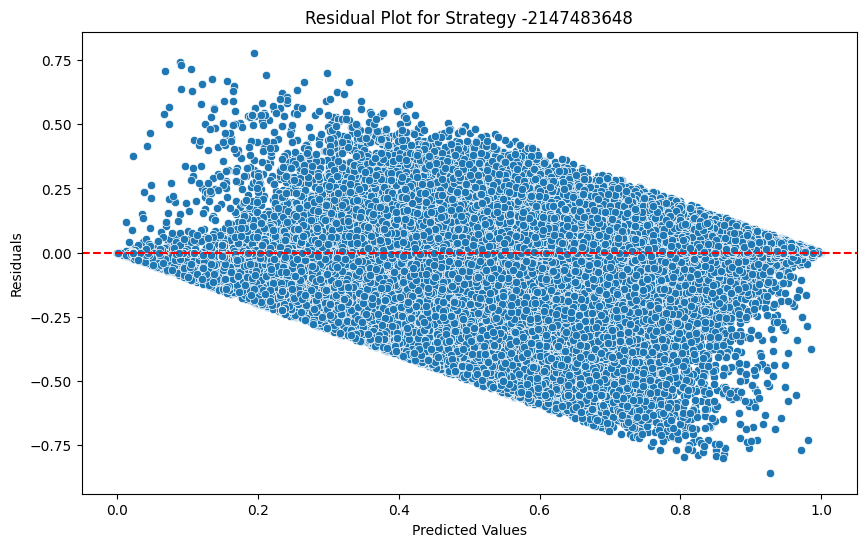

17310/17310 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step
4328/4328 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
Strategy 0 - Random Forest MAE: 0.07994441079713896


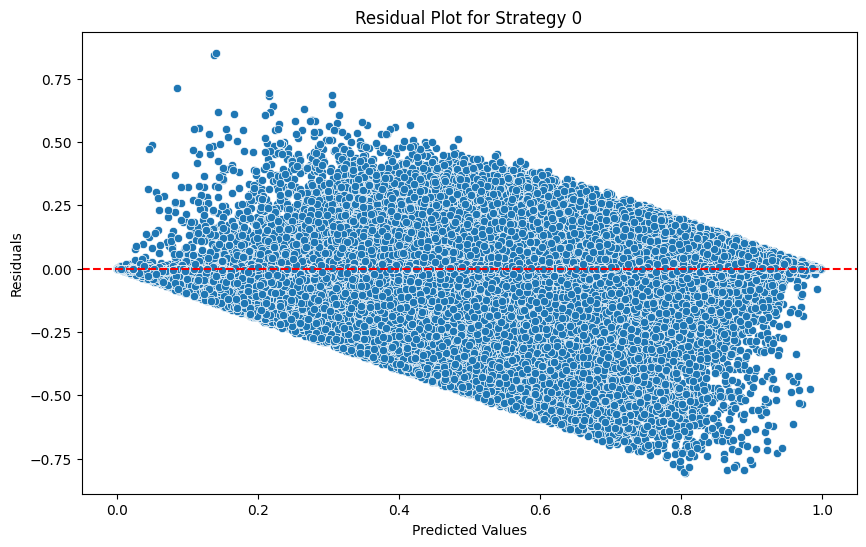

1202/1202 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Strategy 1 - Random Forest MAE: 0.0627151977764201


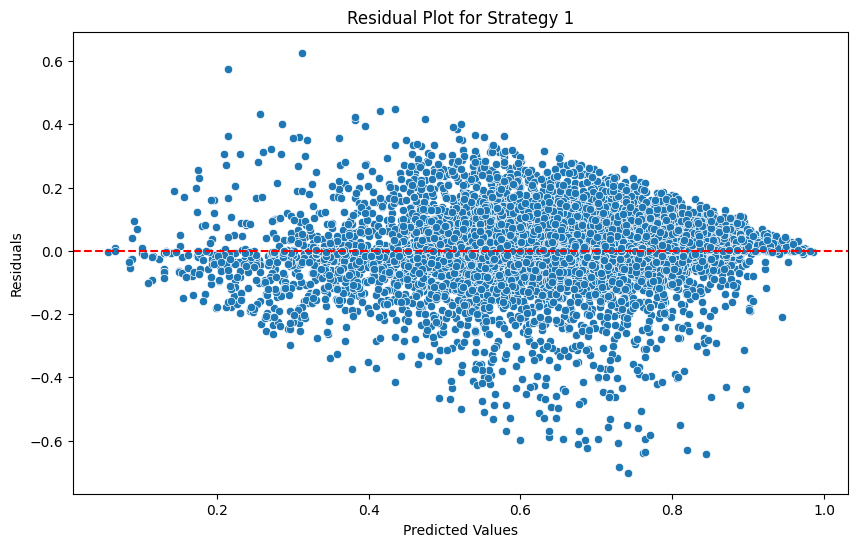

267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Strategy 2 - Random Forest MAE: 0.027509728272255507


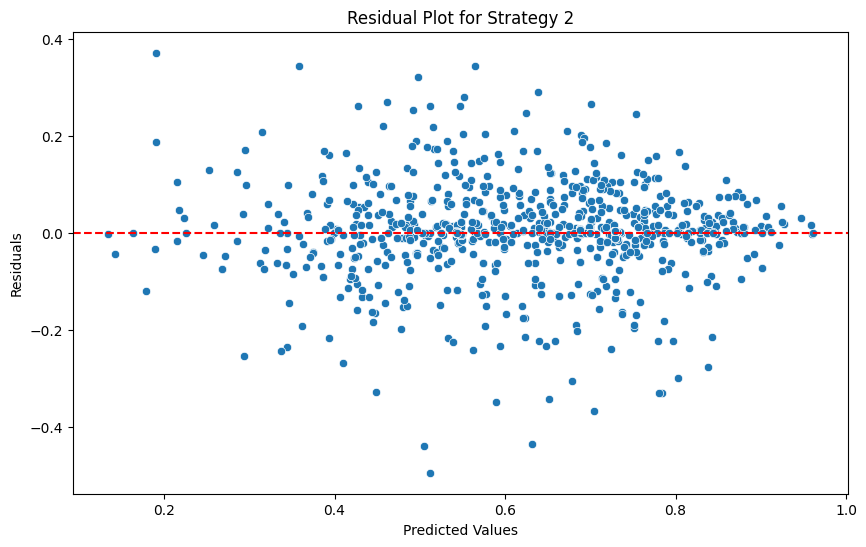

369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Strategy 4 - Random Forest MAE: 0.0616838621334025


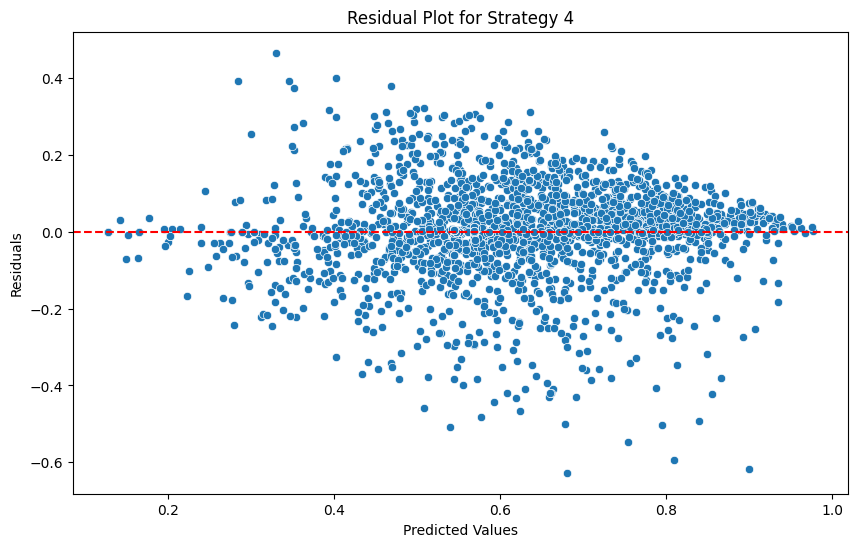

5472/5472 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1368/1368 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Strategy 8 - Random Forest MAE: 0.050668070367750534


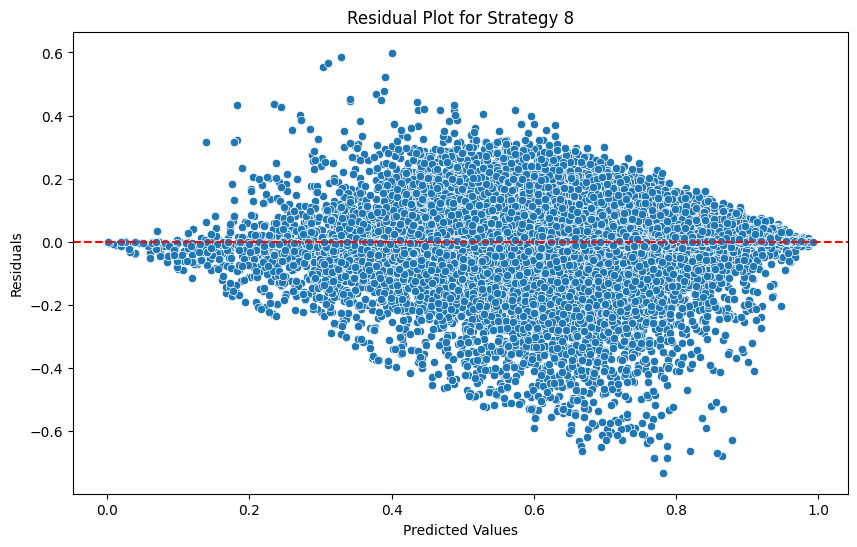

507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Strategy 16 - Random Forest MAE: 0.05650405574998458


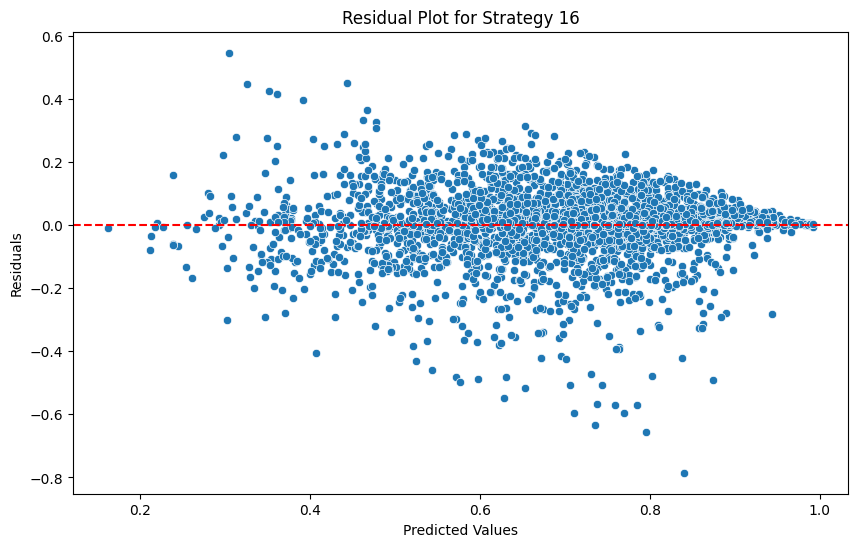

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Strategy 32 - Random Forest MAE: 0.06422683678323825


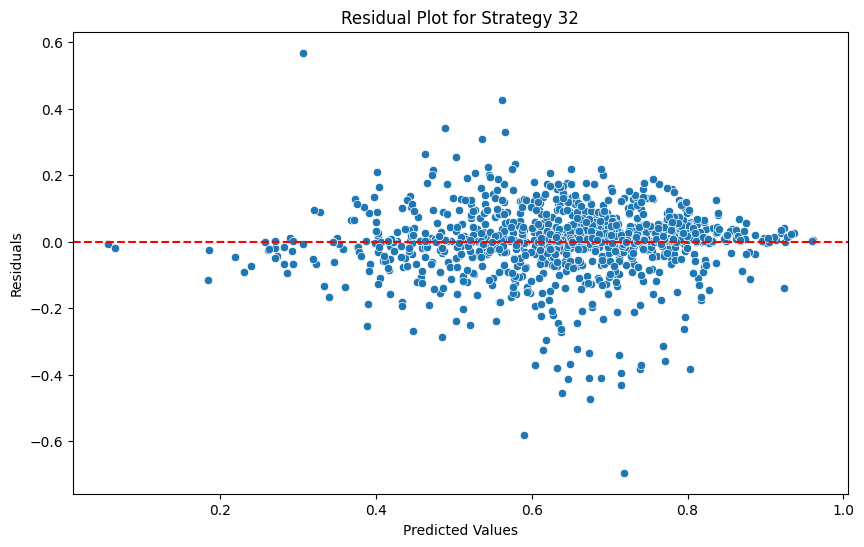

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Strategy 64 - Random Forest MAE: 0.07012840373321899


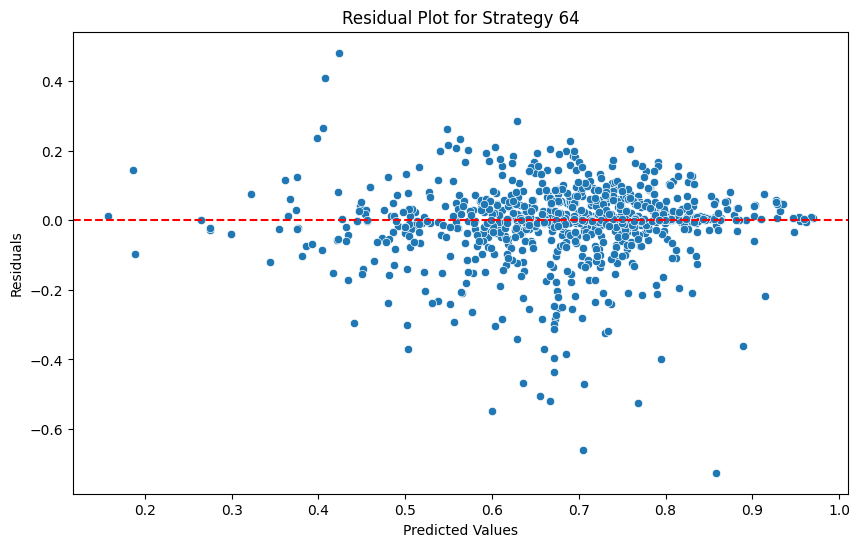

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Strategy 128 - Random Forest MAE: 0.0579891598706541


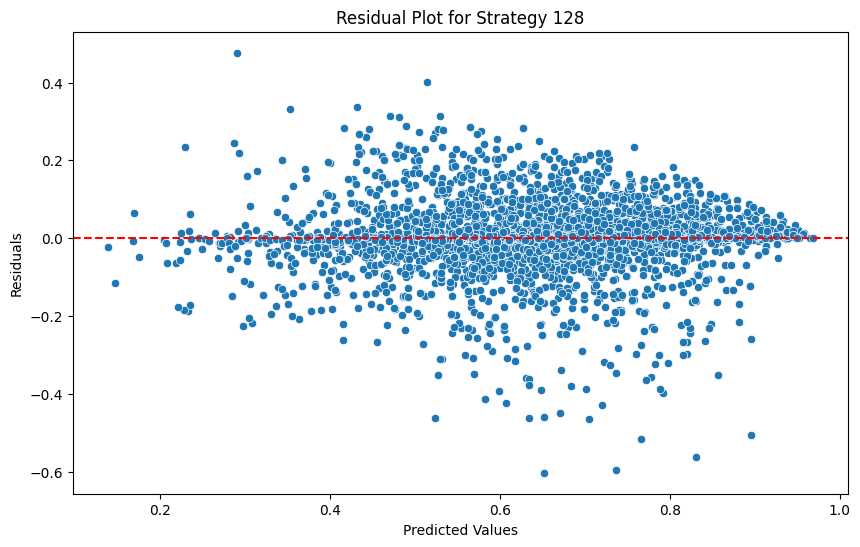

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Strategy 256 - Random Forest MAE: 0.054372319788147924


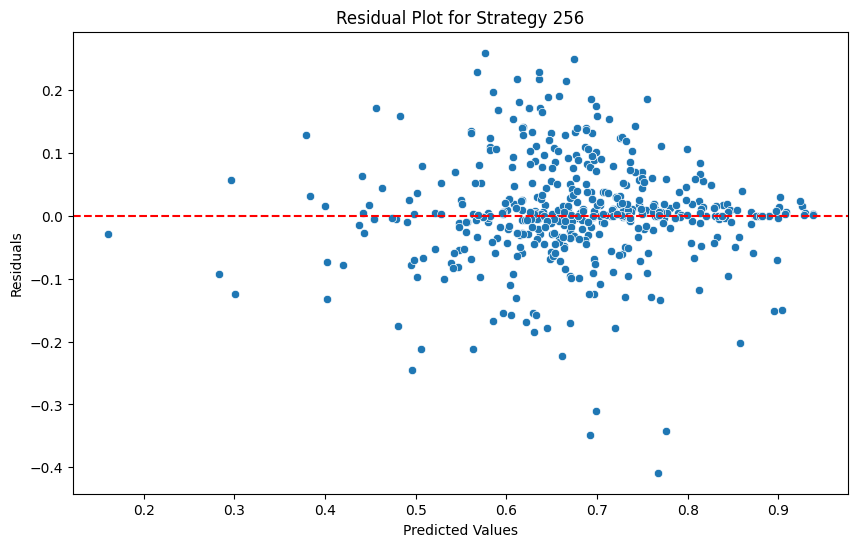

666/666 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Strategy 512 - Random Forest MAE: 0.06566009398828265


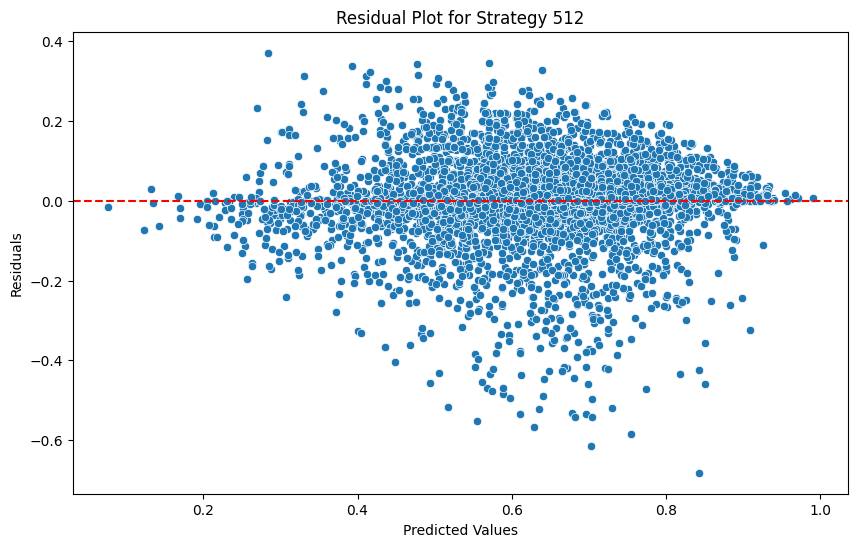

308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Strategy 1024 - Random Forest MAE: 0.05673849683360188


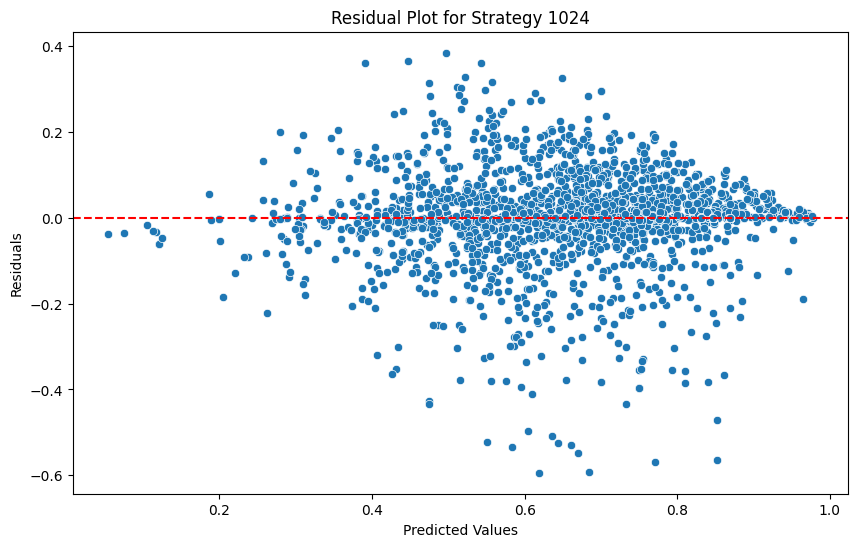

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Strategy 2048 - Random Forest MAE: 0.04805366126191594


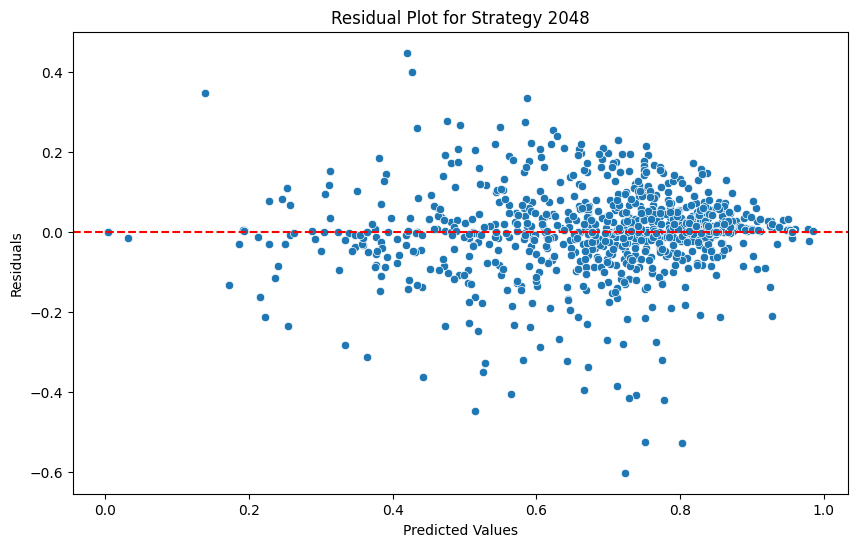

326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Strategy 4096 - Random Forest MAE: 0.06200144543337612


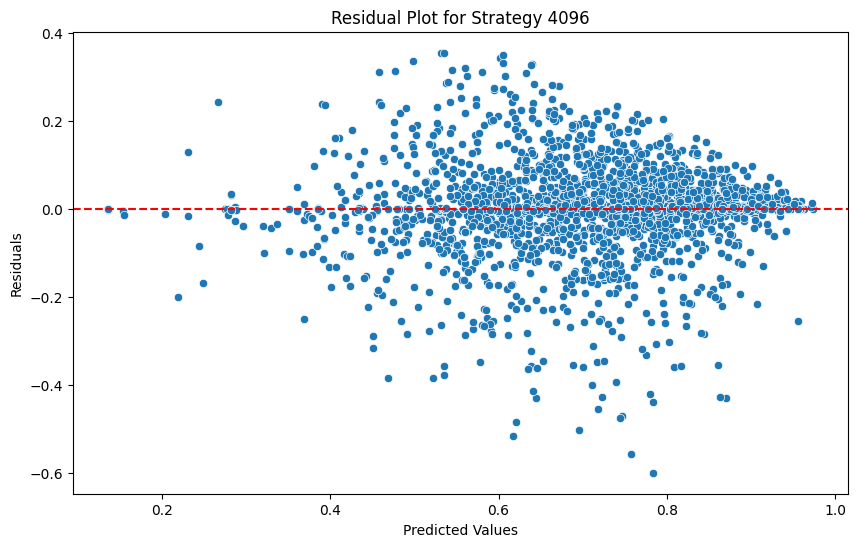

2078/2078 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Strategy 8192 - Random Forest MAE: 0.07299470779275806


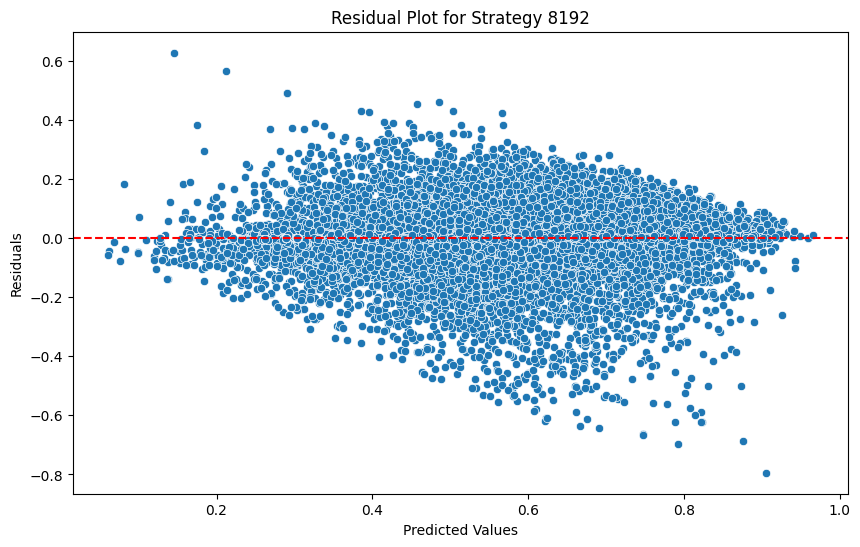

2347/2347 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Strategy 16384 - Random Forest MAE: 0.060406469730801014


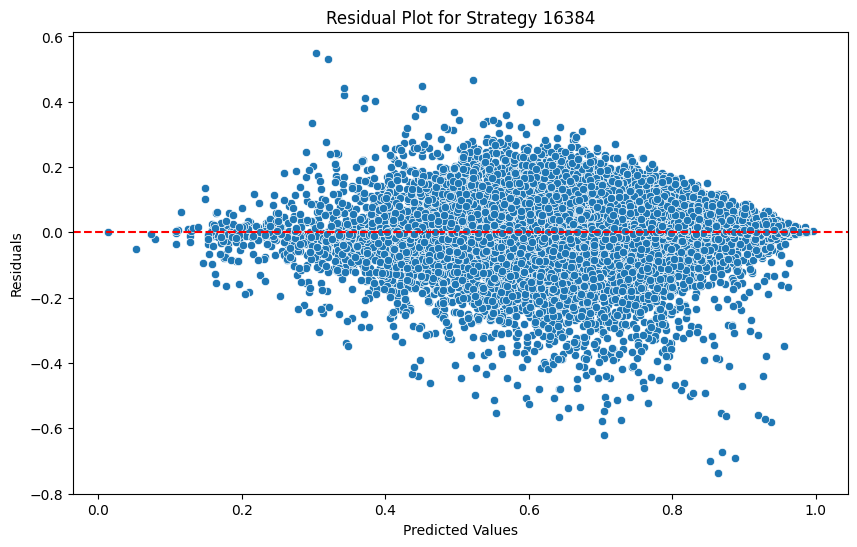

In [16]:
for strategy, group in strategy_groups:
    X = group.drop(columns=['CropUtil', 'fStrategies'])
    y = group['CropUtil']

    # Load the scaler
    scaler_path = f'scalers/{strategy}_scaler.pkl'
    scaler = joblib.load(scaler_path)

    model_path = f'models/{strategy}_rf_model.pkl'
    rf = joblib.load(model_path)
    
    # Load the encoder model
    encoder_path = f'encoders/{strategy}_encoder.h5'
    encoder_model = load_model(encoder_path)

    ##

    X_scaled = scaler.transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Encode the features
    X_train_encoded = encoder_model.predict(X_train)
    X_test_encoded = encoder_model.predict(X_test)

    # Evaluate the model
    y_pred = rf.predict(X_test_encoded)
    mse = mean_absolute_error(y_test, y_pred)
    print(f'Strategy {strategy} - Random Forest MAE: {mse}')

    # Calculate residuals
    residuals = y_test - y_pred

    # Generate residual plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for Strategy {strategy}')
    plt.show()
